# Replica segundo tetra

En este apartado replicamos la metodología seguida en el tetra 2, donde usamos LightGMB, usando los hiperparámetros ganadores en ese tetra.

La metodología es todas las variables + añadidos + una semana antes

In [153]:
import warnings
warnings.filterwarnings("ignore")

In [154]:
import pandas as pd
datos = pd.read_excel("01.Generación sin nulos.xlsx")
datos.head(4)

,dtHora,fltValGeneracion,iNumDia,iNumAnio,iNumSemana,iNumDiaSemana,iNumMes,iCodDia,iCodHora,iNumHora,fltTemp,fltProbabilidadLluvia,fltHumedadRelativa,fltVelocidadViento,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltDPT
0,2022-09-01 00:00:00,0.0,1,2022,36,5,9,6452,154847,24,19,7,77,15,98,0.0,4,4,32,15
1,2022-09-01 01:00:00,0.0,1,2022,36,5,9,6453,154848,1,19,7,82,13,82,0.0,4,4,32,16
2,2022-09-01 02:00:00,0.0,1,2022,36,5,9,6453,154849,2,18,9,85,11,73,0.0,3,4,28,16
3,2022-09-01 03:00:00,0.0,1,2022,36,5,9,6453,154850,3,18,11,87,11,63,0.0,3,4,26,16


In [155]:
datos["MesDia"] = datos["iNumMes"].apply(lambda x: f"{x:02d}") + datos["iNumDia"].apply(lambda x: f"{x:02d}")
datos["Mes"] = datos["iNumMes"].apply(lambda x: f"{x:02d}") + datos["iNumAnio"].apply(lambda x: f"{x:02d}")
datos["iNumDiaAnio"] = datos["dtHora"].dt.day_of_year

In [156]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18290 entries, 0 to 18289
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dtHora                 18290 non-null  datetime64[ns]
 1   fltValGeneracion       18290 non-null  float64       
 2   iNumDia                18290 non-null  int64         
 3   iNumAnio               18290 non-null  int64         
 4   iNumSemana             18290 non-null  int64         
 5   iNumDiaSemana          18290 non-null  int64         
 6   iNumMes                18290 non-null  int64         
 7   iCodDia                18290 non-null  int64         
 8   iCodHora               18290 non-null  int64         
 9   iNumHora               18290 non-null  int64         
 10  fltTemp                18290 non-null  int64         
 11  fltProbabilidadLluvia  18290 non-null  int64         
 12  fltHumedadRelativa     18290 non-null  int64         
 13  f

In [157]:
datos_sinfecha = datos.drop(["dtHora"], axis=1)
datos_sinfecha["MesDia"] = datos_sinfecha["MesDia"].astype(int)
datos_sinfecha["Mes"] = datos_sinfecha["Mes"].astype(int)

In [158]:
datos_sinfecha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18290 entries, 0 to 18289
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fltValGeneracion       18290 non-null  float64
 1   iNumDia                18290 non-null  int64  
 2   iNumAnio               18290 non-null  int64  
 3   iNumSemana             18290 non-null  int64  
 4   iNumDiaSemana          18290 non-null  int64  
 5   iNumMes                18290 non-null  int64  
 6   iCodDia                18290 non-null  int64  
 7   iCodHora               18290 non-null  int64  
 8   iNumHora               18290 non-null  int64  
 9   fltTemp                18290 non-null  int64  
 10  fltProbabilidadLluvia  18290 non-null  int64  
 11  fltHumedadRelativa     18290 non-null  int64  
 12  fltVelocidadViento     18290 non-null  int64  
 13  fltCoberturaNubes      18290 non-null  int64  
 14  fltIndiceUV            18290 non-null  float64
 15  iC

In [159]:
datos_sinfecha.describe().T

,count,mean,std,min,25%,50%,75%,max
fltValGeneracion,18290.0,9392.470410,11398.664257,0.0,0.00,532.0,21829.75,30000.0
iNumDia,18290.0,15.681137,8.818286,1.0,8.00,16.0,23.00,31.0
iNumAnio,18290.0,2023.202078,0.693940,2022.0,2023.00,2023.0,2024.00,2024.0
iNumSemana,18290.0,27.233953,15.038464,1.0,14.00,28.0,40.00,53.0
iNumDiaSemana,18290.0,4.002460,2.000122,1.0,2.00,4.0,6.00,7.0
iNumMes,18290.0,6.626353,3.417353,1.0,4.00,7.0,9.00,12.0
iCodDia,18290.0,6834.033680,220.419345,6452.0,6643.00,6834.0,7025.00,7215.0
iCodHora,18290.0,164005.230782,5290.192481,154847.0,159419.25,164015.5,168587.75,173160.0
iNumHora,18290.0,12.501312,6.923137,1.0,7.00,13.0,19.00,25.0
fltTemp,18290.0,19.456698,6.636539,0.0,15.00,19.0,24.00,39.0


In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
def decompose_generacion(df, share_type='ount', samples=250, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()

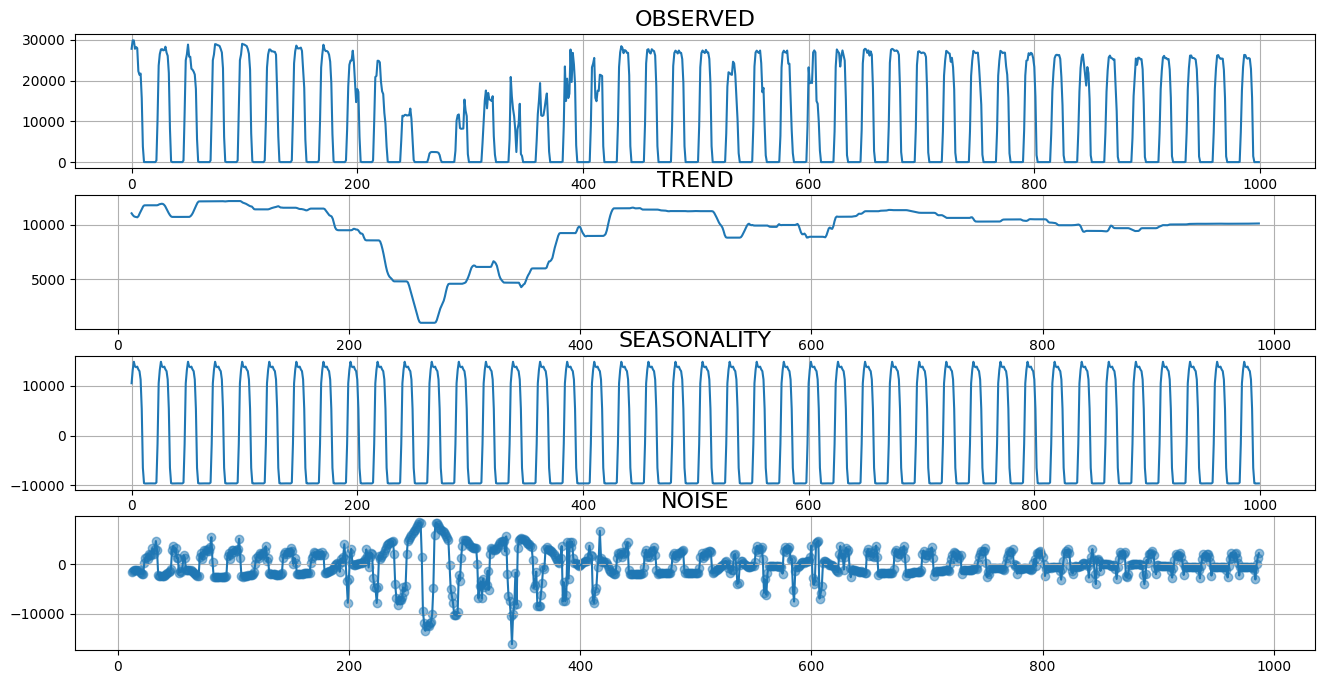

In [161]:
decompose_generacion(datos_sinfecha, share_type="fltValGeneracion", samples=1000, period = 24)

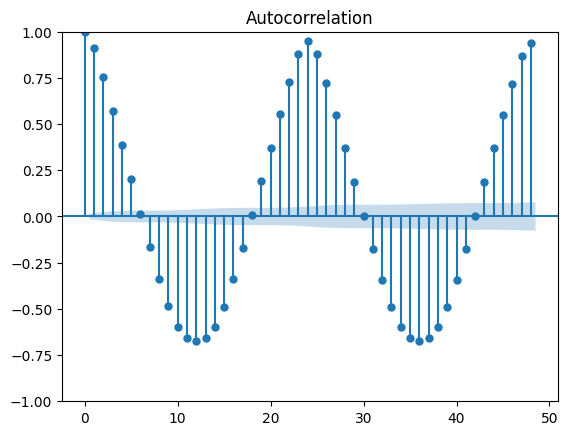

In [162]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(datos_sinfecha["fltValGeneracion"].values, lags=48)
plt.show()

In [163]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [164]:
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mean_absolute_error
from sklearn.metrics import mean_squared_error as mean_squared_error
from sklearn.metrics import r2_score as r2_score
import seaborn as sns

In [165]:
def train_time_series_with_folds(df, model, horizon=24*10):
    X = df.drop('fltValGeneracion', axis=1)
    #X = df[['Anio', 'NumDiaAnio', 'Temperatura', 'CodCondCielo', 'CodDirViento', 'IndiceUV', 'NumDia', 
   # 'NumHora', 'ProbabilidadLluvia', 'DPT', 'CoberturaNubes']]
    y = df['fltValGeneracion']
    
    #take last week of the dataset for validation
    X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
    y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
    
    #create, train and do inference of the model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    predictions = np.clip(predictions, 0, 30000)
    
    #calculate MAE
    mae = np.round(mean_absolute_error(y_test, predictions), 3)
    mape = np.round(mean_absolute_percentage_error(y_test, predictions), 3)    
    r2 = np.round(r2_score(y_test, predictions), 3)    
    rmse = np.round(np.sqrt(mean_squared_error(y_test, predictions)), 3)    
    
    #plot reality vs prediction for the last week of the dataset
    fig = plt.figure(figsize=(16,8))
    plt.title(f'Real vs Prediction - MAE {mae} - MAPE {mape} - R2 {r2} - RMSE {rmse}', fontsize=20)
    plt.plot(y_test, color='red')
    plt.plot(pd.Series(predictions, index=y_test.index), color='green')
    plt.xlabel('Hour', fontsize=16)
    plt.ylabel('Generacion', fontsize=16)
    plt.legend(labels=['Real', 'Prediction'], fontsize=16)
    plt.grid()
    plt.show()
    
    #create a dataframe with the variable importances of the model
    df_importances = pd.DataFrame({
        'feature': model.feature_name_,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    #plot variable importances of the model
    plt.title('Variable Importances', fontsize=16)
    sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
    plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1655
[LightGBM] [Info] Number of data points in the train set: 18266, number of used features: 21
[LightGBM] [Info] Start training from score 9391.502891


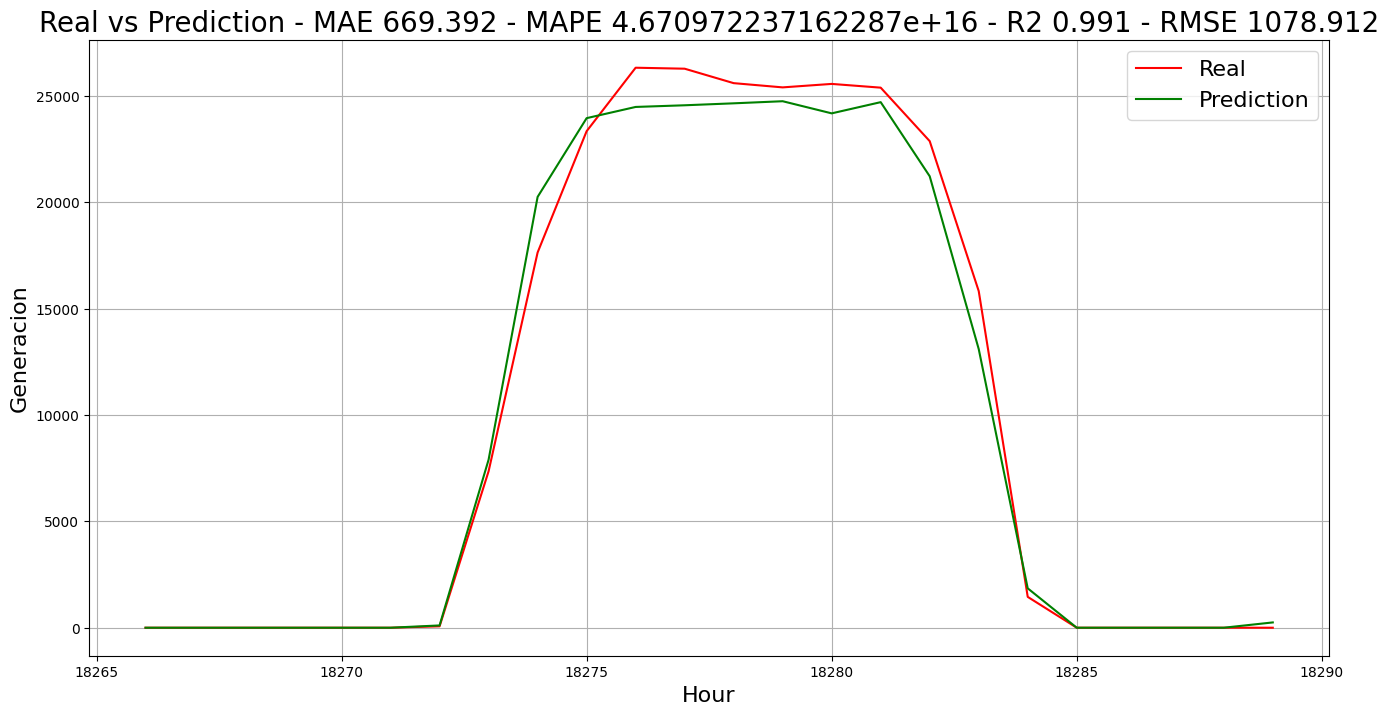

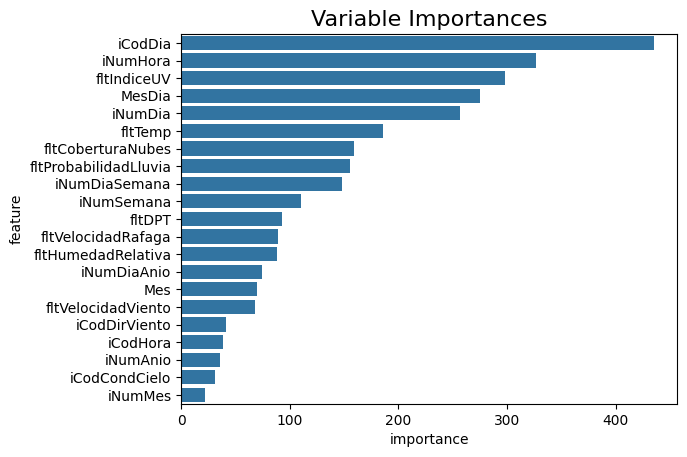

In [166]:
train_time_series_with_folds(datos_sinfecha, LGBMRegressor(), 24)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1910
[LightGBM] [Info] Number of data points in the train set: 18265, number of used features: 22
[LightGBM] [Info] Start training from score 9392.017071


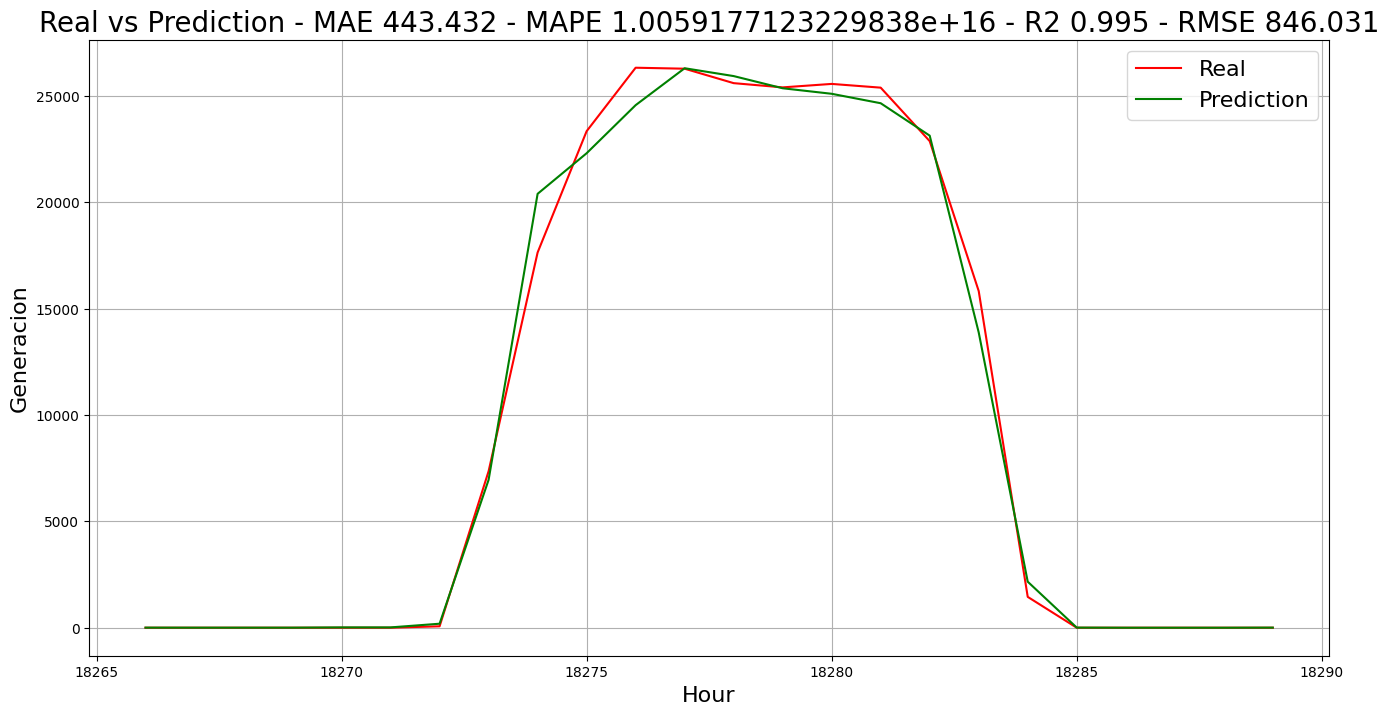

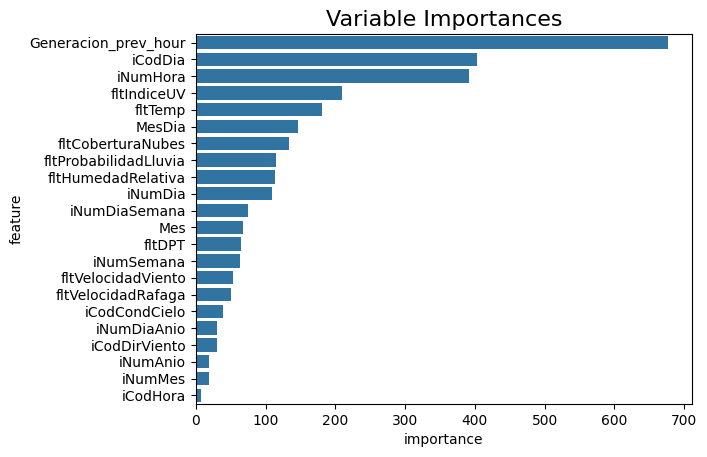

In [167]:
datos_2 = datos_sinfecha.copy()
datos_2["Generacion_prev_hour"] = datos_2["fltValGeneracion"].shift(1)
datos_dropna = datos_2.dropna(how="any", axis= 0)
train_time_series_with_folds(datos_dropna, LGBMRegressor(), 24)

In [168]:
from timeit import default_timer as timer

In [169]:
X = datos_dropna.drop('fltValGeneracion', axis=1)
y = datos_dropna['fltValGeneracion']

In [170]:
#Porcentaje de entrenamiento
porcentaje = 0.8

#Horizonte de predicción
horizon = 1

In [171]:
#División de datos
lentrain100 = int(len(y) * porcentaje)
lentrain100

14631

In [172]:
#Dividimos 80/20
X_train, X_test = X.iloc[:lentrain100, :], X.iloc[lentrain100:, :]
y_train, y_test = y.iloc[:lentrain100], y.iloc[lentrain100:]

In [173]:
# Inicializar listas para métricas
mae_list, rmse_list, r2_list = [], [], []
resultados = pd.DataFrame(columns=['Hora', 'Real', 'Predicho'])

In [174]:
#Modelo LightGBM
model = LGBMRegressor(num_leaves=500, subsample= 0.10698460631792395, colsample_bytree= 0.7272836809565294, min_data_in_leaf= 85)

In [175]:
#Entrenamos en el 80% de los datos
start = timer()
model.fit(X_train, y_train)
end = timer()
print(f"Tiempo de entrenamiento: {end - start:.4f} segundos.")

[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1894
[LightGBM] [Info] Number of data points in the train set: 14631, number of used features: 22
[LightGBM] [Info] Start training from score 9081.481635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [176]:
#Evaluar en cada segmento de 1 día dentro del 20% de los datos
num_pruebas = len(X_test)
num_pruebas

3658

In [177]:
X_test

,iNumDia,iNumAnio,iNumSemana,iNumDiaSemana,iNumMes,iCodDia,iCodHora,iNumHora,fltTemp,fltProbabilidadLluvia,...,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,iCodDirViento,fltVelocidadRafaga,fltDPT,MesDia,Mes,iNumDiaAnio,Generacion_prev_hour
14632,3,2024,18,6,5,7063,169503,15,35,0,...,0,8.0,1,6,20,4,503,52024,124,27978.0
14633,3,2024,18,6,5,7063,169504,16,36,0,...,0,5.0,1,6,24,3,503,52024,124,27794.0
14634,3,2024,18,6,5,7063,169505,17,37,0,...,4,3.0,1,6,22,3,503,52024,124,24296.0
14635,3,2024,18,6,5,7063,169506,18,36,0,...,9,2.0,1,6,32,2,503,52024,124,23086.0
14636,3,2024,18,6,5,7063,169507,19,35,0,...,13,1.0,1,6,39,1,503,52024,124,17247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18285,2,2024,40,4,10,7215,173156,20,22,0,...,2,0.0,1,4,37,9,1002,102024,276,1450.0
18286,2,2024,40,4,10,7215,173157,21,20,0,...,1,0.0,1,4,39,10,1002,102024,276,0.0
18287,2,2024,40,4,10,7215,173158,22,18,0,...,0,0.0,1,4,41,11,1002,102024,276,0.0
18288,2,2024,40,4,10,7215,173159,23,17,0,...,0,0.0,1,4,32,11,1002,102024,276,0.0


In [178]:
# Inicializar listas para métricas
resultados = pd.DataFrame(columns=['Hora', 'Real', 'Predicho'])
#Ciclo diario de predicción
for i in range(num_pruebas):
    inicio = i * horizon
    fin = inicio + horizon

    X_test_seg = X_test.iloc[inicio:fin, :]
    y_test_seg = y_test.iloc[inicio:fin]

    if len(X_test_seg) < horizon:
        break

    y_pred = model.predict(X_test_seg)
    y_pred = np.clip(y_pred, 0, 30000)  # 🔹 Limitamos entre 0 y 30,000

    df_temp = pd.DataFrame({
        'Hora': X_test_seg.iCodHora,
        'Real': y_test_seg,
        'Predicho': y_pred
    })

    resultados = pd.concat([resultados, df_temp], ignore_index=True)

[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] min

In [181]:
print(f"MAE: {mean_absolute_error(resultados['Real'], resultados['Predicho']):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(resultados['Real'], resultados['Predicho'])):.4f}")
print(f"R²: {r2_score(resultados['Real'], resultados['Predicho']):.4f}")

MAE: 1078.1802
RMSE: 2228.1048
R²: 0.9643


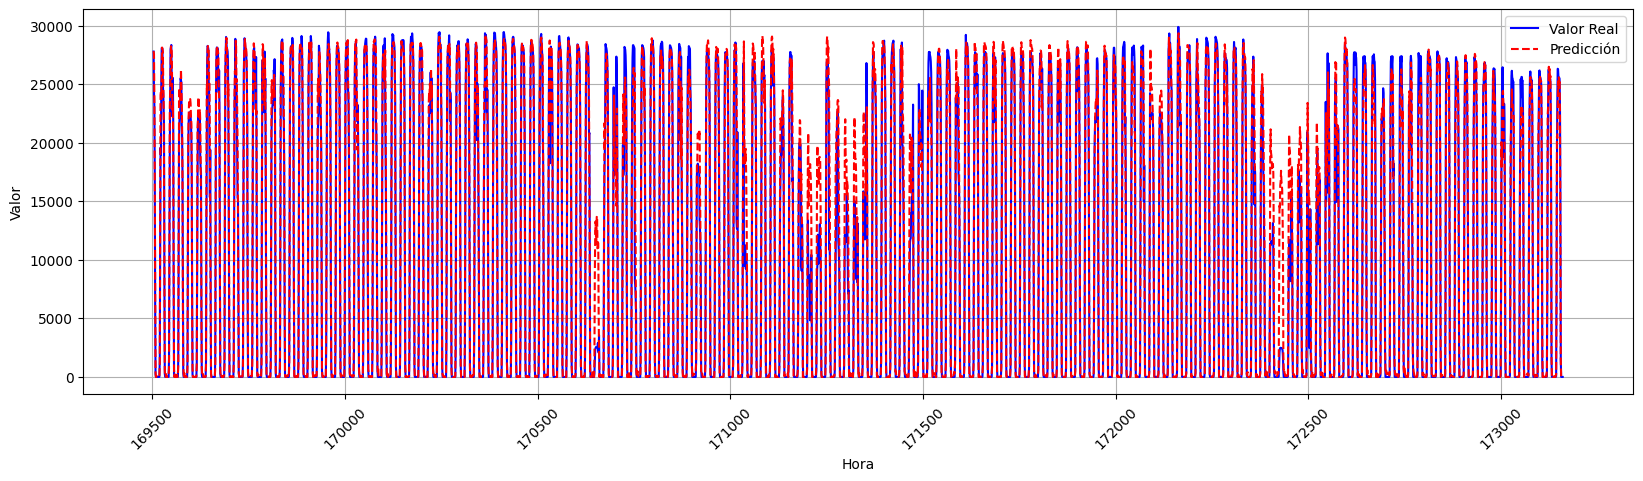

In [188]:
plt.figure(figsize=(20, 5))
plt.plot(resultados['Hora'], resultados['Real'], label='Valor Real', color='blue')
plt.plot(resultados['Hora'], resultados['Predicho'], label='Predicción', color='red', linestyle='dashed')
plt.xlabel("Hora")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

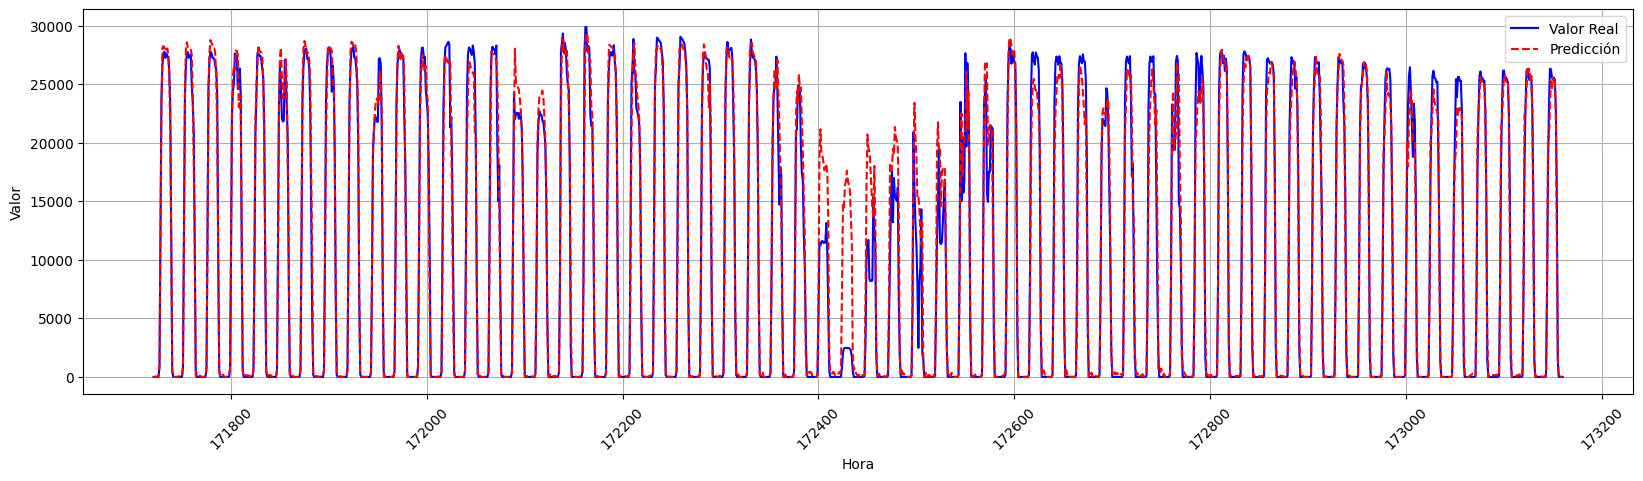

In [189]:
resultados_filtro = resultados.iloc[-(24*60):,:]
plt.figure(figsize=(20, 5))
plt.plot(resultados_filtro['Hora'], resultados_filtro['Real'], label='Valor Real', color='blue')
plt.plot(resultados_filtro['Hora'], resultados_filtro['Predicho'], label='Predicción', color='red', linestyle='dashed')
plt.xlabel("Hora")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

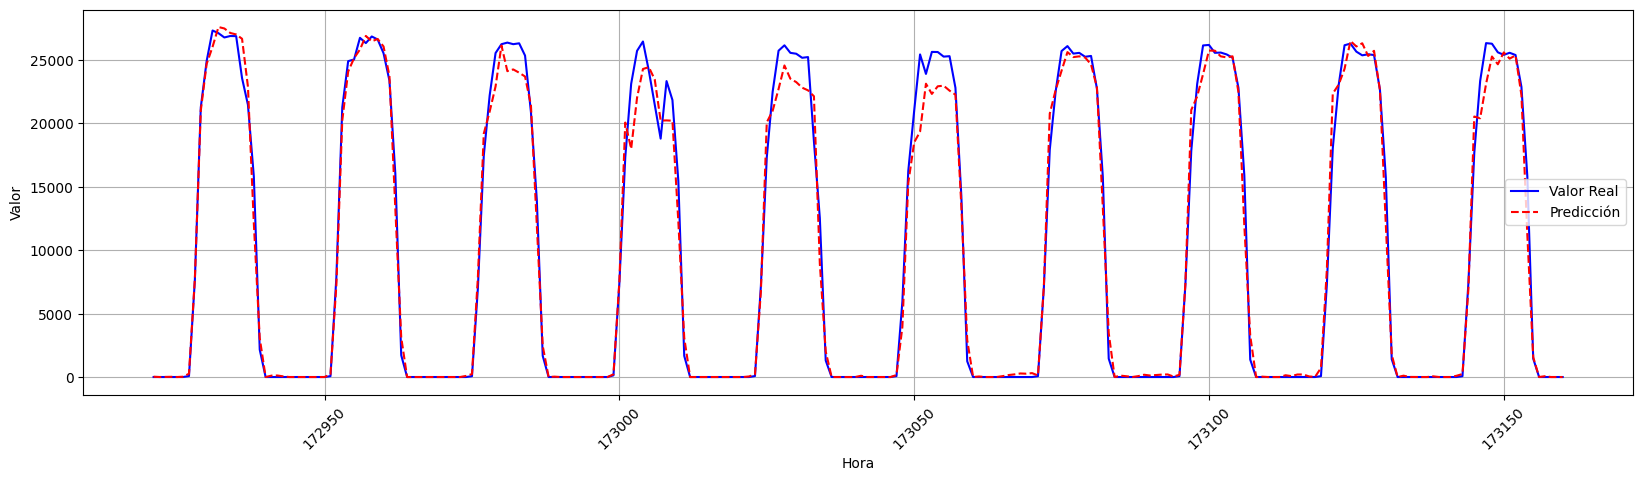

In [190]:
resultados_filtro = resultados.iloc[-(24*10):,:]
plt.figure(figsize=(20, 5))
plt.plot(resultados_filtro['Hora'], resultados_filtro['Real'], label='Valor Real', color='blue')
plt.plot(resultados_filtro['Hora'], resultados_filtro['Predicho'], label='Predicción', color='red', linestyle='dashed')
plt.xlabel("Hora")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()